自動車データを使用して自動車の燃費を予測<br>
１ガロンあたりどのくらい走れるかを予測

In [161]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from pathlib import Path # ファイルパス操作ライブラリ

In [162]:
DATASET_PATH = Path('/Users/akiyoshi-n/Documents/data_analysis/data_analysis/data')

In [163]:
# car_nameというカラムが本当はあったがデータのダウンロード上削除した
df = pd.read_excel(f'{DATASET_PATH}/car_distance_prediction.xlsx')
print(df.shape)
df.head(5)

(199, 9)


,id,cylinders,displacement,horsepower,acceleration,model_year,origin,drive_system,kpl
0,192,6,250,105.0,14.5,76,1,RR,22.0
1,27,8,318,210.0,13.5,70,1,FF,11.0
2,89,8,318,150.0,12.5,73,1,FR,15.0
3,310,4,89,60.0,18.8,80,3,FF,38.1
4,73,8,307,130.0,14.0,72,1,MR,13.0


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            199 non-null    int64  
 1   cylinders     199 non-null    int64  
 2   displacement  199 non-null    int64  
 3   horsepower    198 non-null    float64
 4   acceleration  199 non-null    float64
 5   model_year    199 non-null    int64  
 6   origin        199 non-null    int64  
 7   drive_system  199 non-null    object 
 8   kpl           199 non-null    float64
dtypes: float64(3), int64(5), object(1)
memory usage: 14.1+ KB


In [165]:
# idは不要なので削除
# kplの予測
df = df.drop('id', axis=1)
df.head(5)

,cylinders,displacement,horsepower,acceleration,model_year,origin,drive_system,kpl
0,6,250,105.0,14.5,76,1,RR,22.0
1,8,318,210.0,13.5,70,1,FF,11.0
2,8,318,150.0,12.5,73,1,FR,15.0
3,4,89,60.0,18.8,80,3,FF,38.1
4,8,307,130.0,14.0,72,1,MR,13.0


In [166]:
# データの欠損値を確認
df.isnull().sum()

cylinders       0
displacement    0
horsepower      1
acceleration    0
model_year      0
origin          0
drive_system    0
kpl             0
dtype: int64

In [167]:
# 欠損値が１つなので削除
df = df.dropna()
df.isnull().sum()

cylinders       0
displacement    0
horsepower      0
acceleration    0
model_year      0
origin          0
drive_system    0
kpl             0
dtype: int64

In [168]:
df.shape

(198, 8)

In [169]:
# 基本統計量を確認
df.describe()

,cylinders,displacement,horsepower,acceleration,model_year,origin,kpl
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,5.393939,190.388889,102.883529,15.692929,75.792929,1.616162,23.961111
std,1.669786,103.947933,38.208195,2.760518,3.670786,0.827289,8.399846
min,3.000000,70.000000,46.000000,8.500000,70.000000,1.000000,9.000000
25%,4.000000,98.750000,75.000000,14.000000,73.000000,1.000000,17.000000
50%,4.000000,142.000000,95.000000,15.500000,76.000000,1.000000,23.000000
75%,6.000000,258.000000,112.000000,17.475000,79.000000,2.000000,30.375000
max,8.000000,455.000000,230.000000,24.600000,82.000000,3.000000,46.600000


array([[<Axes: title={'center': 'cylinders'}>,
        <Axes: title={'center': 'displacement'}>,
        <Axes: title={'center': 'horsepower'}>],
       [<Axes: title={'center': 'acceleration'}>,
        <Axes: title={'center': 'model_year'}>,
        <Axes: title={'center': 'origin'}>],
       [<Axes: title={'center': 'kpl'}>, <Axes: >, <Axes: >]],
      dtype=object)

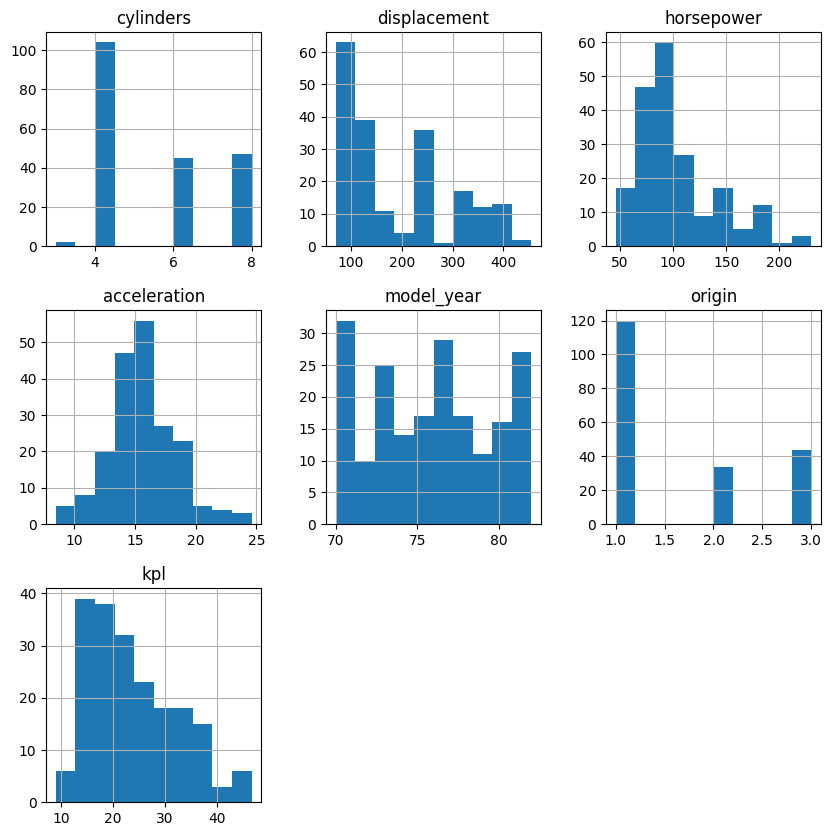

In [170]:
# データの分布を確認
df.hist(figsize=(10, 10))
# 上の基本統計量の見方としては中央値が平均値よりも小さいので，データが左に偏っていると言える

In [171]:
# 質的データの頻度値の算出
df['drive_system'].value_counts()

drive_system
FR     65
FF     52
4WD    31
RR     27
MR     23
Name: count, dtype: int64

Text(0, 0.5, 'count')

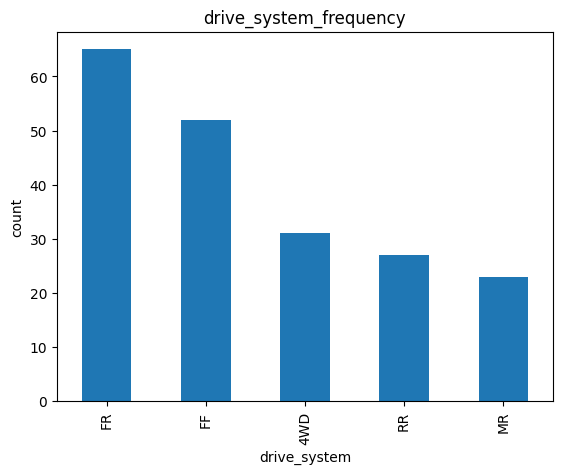

In [172]:
# 質的データの棒グラフ
df['drive_system'].value_counts().plot(kind='bar', title='drive_system_frequency') # Seriesのplotメソッドを使う
plt.xlabel('drive_system')
plt.ylabel('count')

<Axes: >

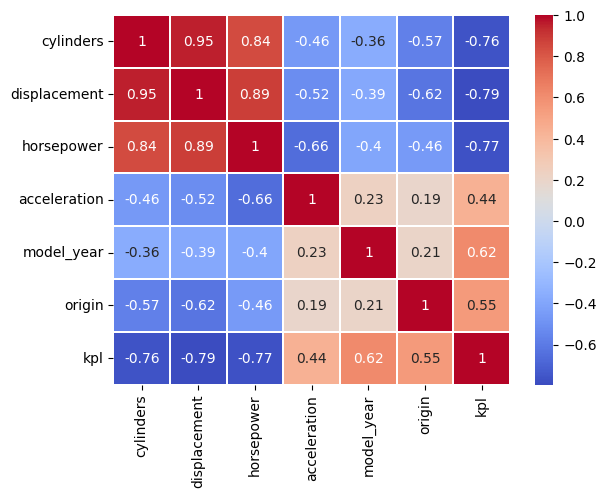

In [173]:
# 相関係数を確認
# 数値データのみを抽出
df_num = df.select_dtypes(include='number') # 数値データのみを抽出
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm', linewidths=0.1)

Text(0, 0.5, 'kpl')

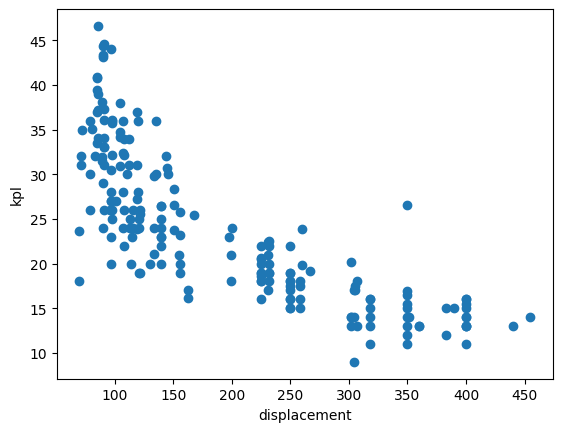

In [174]:
# kplと相関係数が高いのはdisplacementであるので散布図を描画
plt.scatter(df['displacement'], df['kpl'])
plt.xlabel('displacement')
plt.ylabel('kpl')
# displacementが350付近で外れ値がある

Text(0, 0.5, 'kpl')

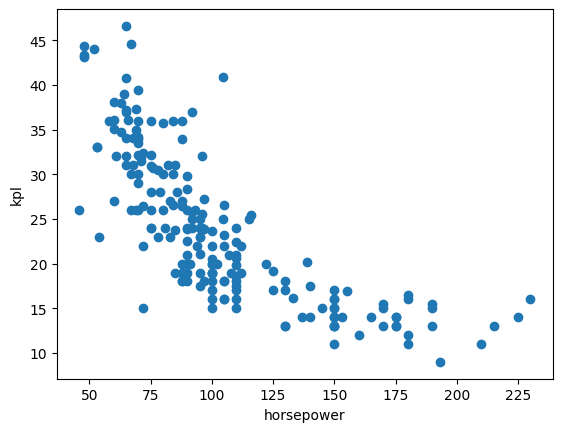

In [175]:
# horsepowerとkplの散布図
plt.scatter(df['horsepower'], df['kpl'])
plt.xlabel('horsepower')
plt.ylabel('kpl')

Text(0, 0.5, 'kpl')

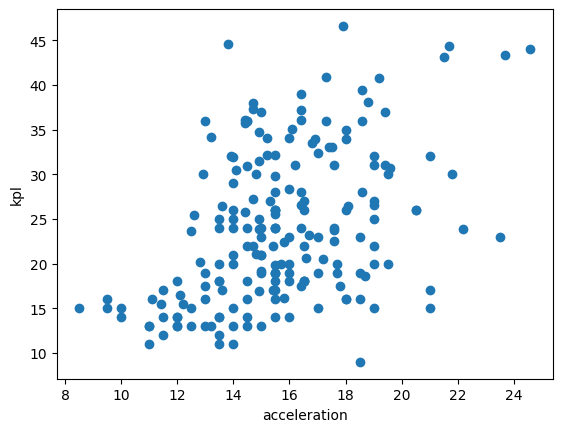

In [176]:
# accelerationとkplの散布図
plt.scatter(df['acceleration'], df['kpl'])
plt.xlabel('acceleration')
plt.ylabel('kpl')
# 相関がない

量的データ(kpl)と質的データの相関を見る

<Axes: xlabel='drive_system', ylabel='kpl'>

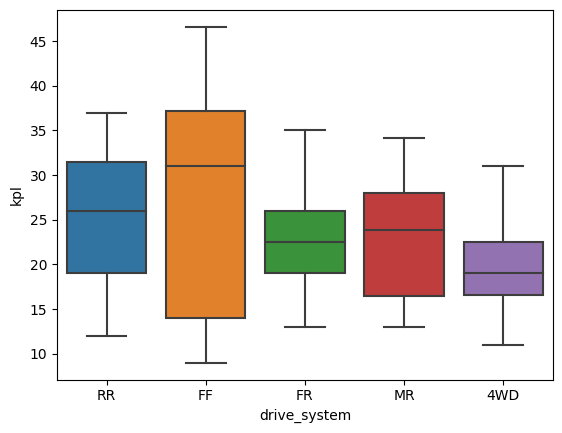

In [177]:
# drive_systemとkplの関係を確認
# この場合は箱ひげ図が適している
sns.boxplot(x='drive_system', y='kpl', data=df)

### モデル作成

In [178]:
# データ作成
X = df[['cylinders','displacement','horsepower','acceleration','model_year','origin']]
y = df['kpl']
print(X.shape)

(198, 6)


In [179]:
# 学習データとテストデータに分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=32)
print(X_train.shape)

(138, 6)


In [180]:
# 評価指標の作成(RMSE)
from sklearn.metrics import mean_squared_error as MSE
def rmse(y_true, y_pred):
    mse = MSE(y_true, y_pred)
    rmse = np.sqrt(mse)
    return rmse

過学習が起きていないかのチェックは学習データを使用して予測を行った時の精度とtestデータを用いて予測を行った時の精度の差が少ない時

In [181]:
# 重回帰モデルを作成
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_train = lr.predict(X_train)
y_pred = lr.predict(X_test)
print('trainデータの評価: ',rmse(y_train, y_pred_train))
print('testデータの評価: ',rmse(y_test, y_pred))
# 精度にあまり差がないため過学習はしていないと言える

trainデータの評価:  3.942879266594459
testデータの評価:  4.292307419332628


予測精度だけでは，予測結果の傾向まではわからない<br>
具体的には予測値が小さい時に外しやすいのか，大きい時に外しやすいのか

4.403206019700189 44.0


Text(0, 0.5, 'y_pred')

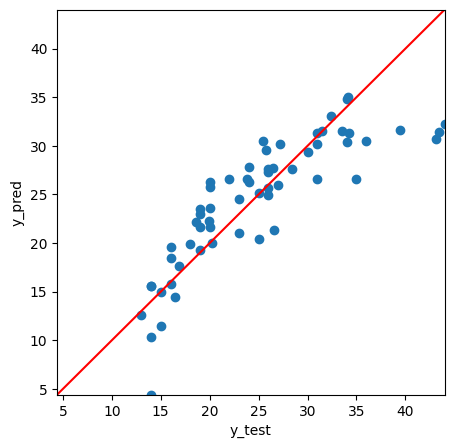

In [182]:
plt.figure(figsize=(5, 5)) # 図のサイズを正方形にする
plt.scatter(y_test, y_pred)
# 予測値と実測値の最大最小を求めて値域を合わせる
test_min = np.min(y_test)
test_max = np.max(y_test)
pred_min = np.min(y_pred)
pred_max = np.max(y_pred)
min = np.min([test_min, pred_min])
max = np.max([test_max, pred_max])
print(min, max)
# これによって値域が決まった
plt.xlim([min, max])
plt.ylim([min, max])
# 対角線を引く
plt.plot([min, max], [min, max], color='red')
plt.xlabel('y_test')
plt.ylabel('y_pred')

ダミー変数化：質的データを量的データに変換すること<br>
ラベルエンコーディングとOne-Hot表現の二つがあるが大きさに意味を持たせるという意味がない場合はOne-Hot表現を使用する．

In [183]:
X = df[['cylinders', 'displacement', 'horsepower', 'acceleration','model_year', 'origin', 'drive_system']]
y = df['kpl']

In [184]:
# drive_systemをダミー変数化
X = pd.get_dummies(X) # 数値データ以外をダミー変数化
X.head(5)

,cylinders,displacement,horsepower,acceleration,model_year,origin,drive_system_4WD,drive_system_FF,drive_system_FR,drive_system_MR,drive_system_RR
0,6,250,105.0,14.5,76,1,False,False,False,False,True
1,8,318,210.0,13.5,70,1,False,True,False,False,False
2,8,318,150.0,12.5,73,1,False,False,True,False,False
3,4,89,60.0,18.8,80,3,False,True,False,False,False
4,8,307,130.0,14.0,72,1,False,False,False,True,False


In [185]:
# モデルで予測
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=32)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_train = lr.predict(X_train)
y_pred = lr.predict(X_test)
print('trainデータの評価: ',rmse(y_train, y_pred_train))
print('testデータの評価: ',rmse(y_test, y_pred))
# 精度が向上した

trainデータの評価:  2.350422597019804
testデータの評価:  2.7657259387748887


対数化を用いて精度向上を目指す<br>
対数化：log2()のこと．8は3になる<br>
データのyと特徴量の散布図が指数関数の形の時はlogを取ってやると直線で表せる可能性がある．<br>
データを線型回帰モデルに当てはめる分布に変化できる可能性がある

Text(0, 0.5, 'kpl')

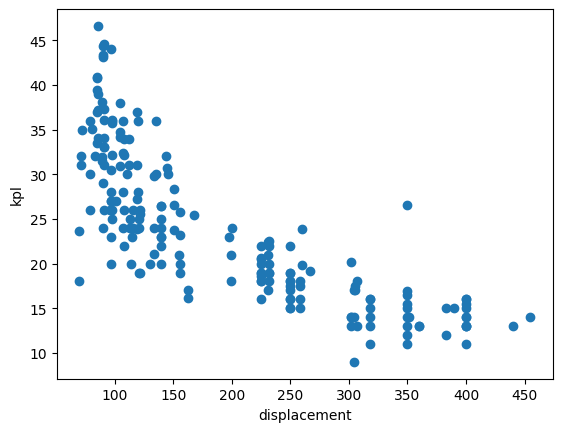

In [186]:
# kplとdisplacementの散布図を描画
plt.scatter(df['displacement'], df['kpl'])
plt.xlabel('displacement')
plt.ylabel('kpl')
# 対数化すると良さそう

Text(0, 0.5, 'kpl')

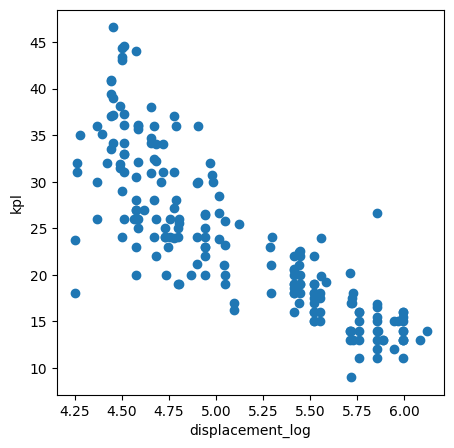

In [187]:
# Xに対数化したdisplacementを追加
df['displacement_log'] = np.log(df['displacement'])
# displacement_logとkplの散布図を描画
plt.figure(figsize=(5, 5))
plt.scatter(df['displacement_log'], df['kpl'])
plt.xlabel('displacement_log')
plt.ylabel('kpl')

In [188]:
X = df[['cylinders', 'displacement_log', 'horsepower', 'acceleration','model_year', 'origin', 'drive_system']]
y = df['kpl']
X = pd.get_dummies(X)
# モデルで予測
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=32)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_train = lr.predict(X_train)
y_pred = lr.predict(X_test)
print('trainデータの評価: ',rmse(y_train, y_pred_train))
print('testデータの評価: ',rmse(y_test, y_pred))
# 精度が向上した

trainデータの評価:  2.272323562383739
testデータの評価:  2.6002496513622253
